### K-Nearest Neighbors

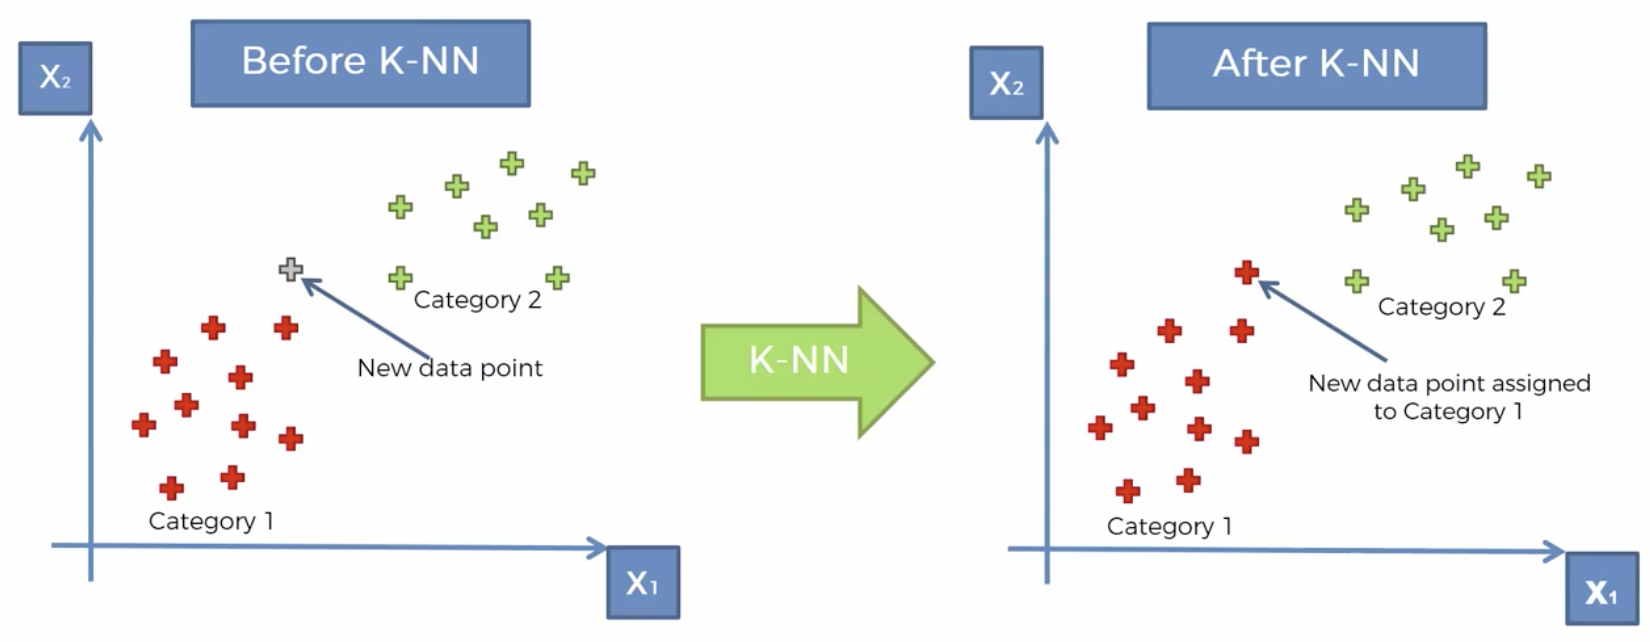

In [1]:
from IPython.display import Image, display
display(Image(filename='first_knn.png', width=750, height=200, embed=True))

<div style="text-align: left"> &copy; SuperDataScience </div>

* Motivation:
    *  Assuming we have two categories present in our dataset (category 1 & category 2)
    *  And assume we have two IVs (i.e. two columns in our dataset -> X1 & X2)
    *  And suppose we add a new data point, how do we determine which category it fits into
* Methodology:
    1.  Choose the number K of neighbors
    2.  Take the K nearest neighbors of the new data point, according to the Euclidean distance (you can use other distances if you want)
    3.  Among these K neighbors, count the number of data points in each category
    4.  Assign the new data point to the category where you counted the most neighbors

$$
\begin{equation}
\mathbf{Euclidean\;Distance\;b/w\;P_1\;and\;P_2:} \;\; = \sqrt{(x_2 - x_1)^2 + (y_2 - x_1)^2} \\
\end{equation}
$$

#### Implementation

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# Feature Scaling - NECESSARY
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fitting K-NN classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# Predicting the K-NN Test set results
y_pred = classifier.predict(X_test)

In [11]:
# Making the K-NN Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

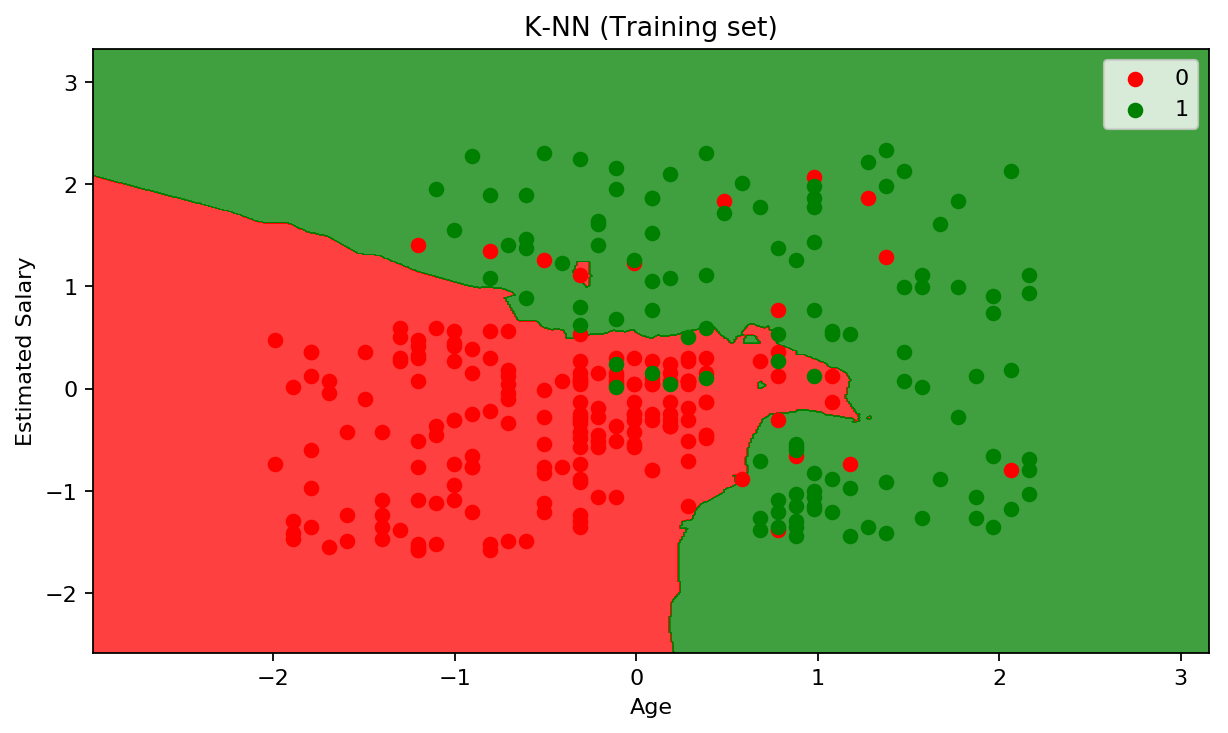

In [19]:
# Visualising the K-NN Training set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

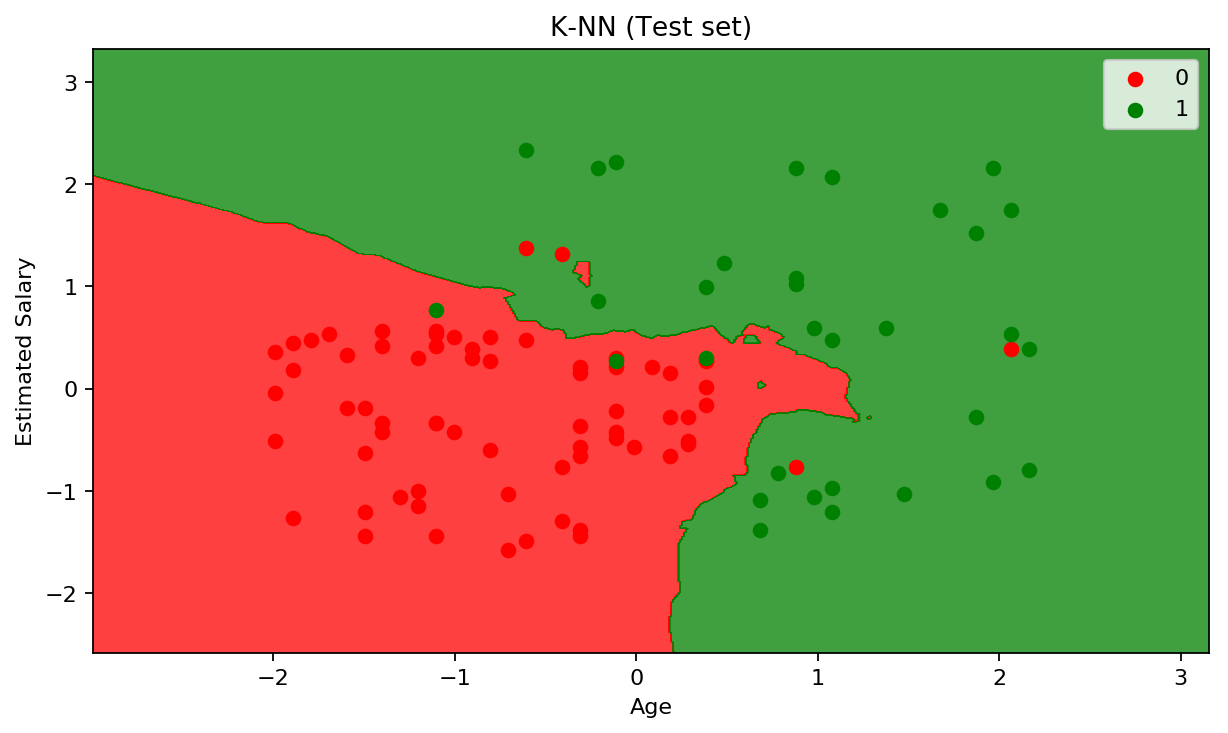

In [20]:
# Visualising the K-NN Test set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Looks great! :)